# EDA: 데이터 개요 및 팀별 분석 (Data Summary & Team Analysis)

이 노트북은 DACON K-League 데이터셋의 기본적인 구조 파악과 함께, 참가 팀 현황 및 경기 수를 분석합니다.

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 경로 설정
base_path = '../data'
match_info_path = os.path.join(base_path, 'match_info.csv')
raw_data_path = os.path.join(base_path, 'raw_data.csv')

# 데이터 로드
match_info = pd.read_csv(match_info_path)
# raw_data는 크기가 크므로 필요한 경우에만 로드하거나 샘플링하여 사용
# raw_data = pd.read_csv(raw_data_path) 

print("데이터 로드 완료")

데이터 로드 완료


## 1. 참가 팀 분석

`match_info` 데이터를 바탕으로 어떤 팀들이 경기에 참여했는지 확인합니다.

In [6]:
# 홈 팀과 어웨이 팀 목록 추출
home_teams = match_info['home_team_name_ko'].unique()
away_teams = match_info['away_team_name_ko'].unique()

all_teams = sorted(list(set(home_teams) | set(away_teams)))

print(f"총 참가 팀 수: {len(all_teams)}개")
print("참가 팀 명단:")
for team in all_teams:
    print(f"- {team}")

총 참가 팀 수: 12개
참가 팀 명단:
- FC서울
- 강원FC
- 광주FC
- 김천 상무 프로축구단
- 대구FC
- 대전 하나 시티즌
- 수원FC
- 울산 HD FC
- 인천 유나이티드
- 전북 현대 모터스
- 제주SK FC
- 포항 스틸러스


## 2. 팀별 경기 수 분석

각 팀이 홈과 어웨이에서 각각 몇 번의 경기를 치렀는지 분석합니다.

,홈_경기수,어웨이_경기수,총_경기수
FC서울,16,17,33
강원FC,16,17,33
광주FC,17,16,33
김천 상무 프로축구단,16,17,33
대구FC,17,16,33
대전 하나 시티즌,17,16,33
수원FC,16,17,33
울산 HD FC,17,16,33
인천 유나이티드,16,17,33
전북 현대 모터스,16,17,33


<Figure size 1200x600 with 0 Axes>

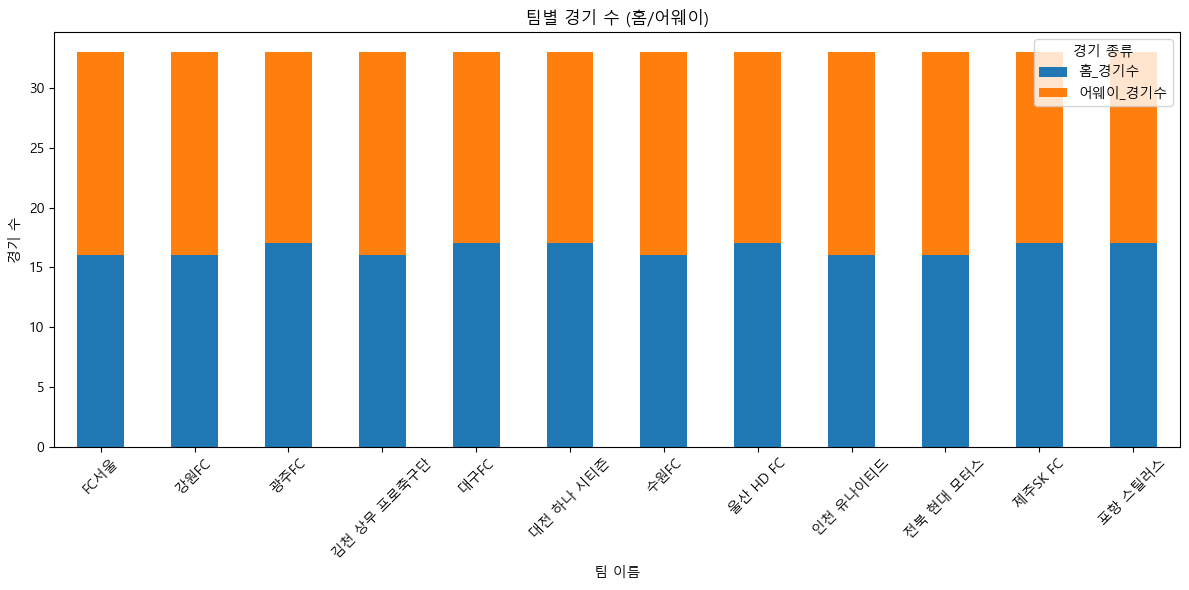

In [7]:
# 홈/어웨이 경기 수 계산
home_counts = match_info['home_team_name_ko'].value_counts().sort_index()
away_counts = match_info['away_team_name_ko'].value_counts().sort_index()

# 데이터프레임으로 합치기
team_stats = pd.DataFrame({
    '홈_경기수': home_counts,
    '어웨이_경기수': away_counts
}).fillna(0).astype(int)

team_stats['총_경기수'] = team_stats['홈_경기수'] + team_stats['어웨이_경기수']
team_stats = team_stats.sort_values(by='총_경기수', ascending=False)

display(team_stats)

# 시각화
plt.figure(figsize=(12, 6))
team_stats[['홈_경기수', '어웨이_경기수']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('팀별 경기 수 (홈/어웨이)')
plt.xlabel('팀 이름')
plt.ylabel('경기 수')
plt.xticks(rotation=45)
plt.legend(title='경기 종류')
plt.tight_layout()
plt.show()

## 3. 팀별 득점 및 실점 요약

경기 결과를 바탕으로 팀별 공격력과 수비력을 대략적으로 파악합니다.

,총_득점,총_실점,득실차
home_team_name_ko,,,
강원FC,58,50,8
울산 HD FC,53,36,17
포항 스틸러스,51,42,9
김천 상무 프로축구단,50,37,13
FC서울,49,38,11
수원FC,47,50,-3
전북 현대 모터스,45,54,-9
광주FC,40,46,-6
대구FC,40,42,-2


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17824\2145406231.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_performance.index, y='득실차', data=team_performance, palette='vlag')


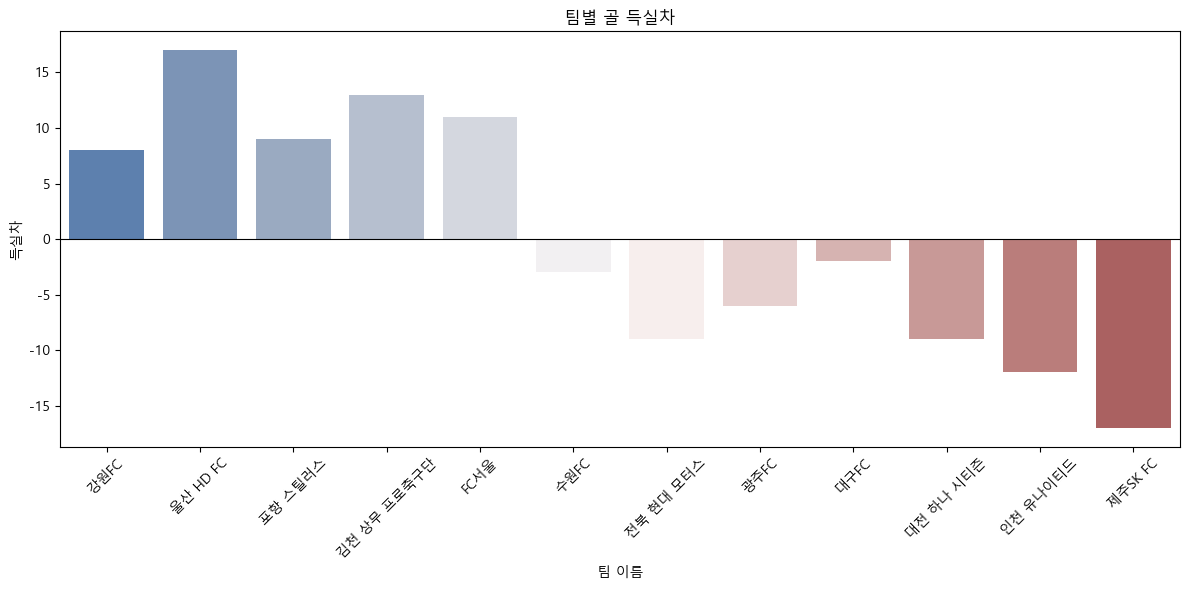

In [8]:
# 홈 득점/실점
home_goals = match_info.groupby('home_team_name_ko')['home_score'].sum()
home_conceded = match_info.groupby('home_team_name_ko')['away_score'].sum()

# 어웨이 득점/실점
away_goals = match_info.groupby('away_team_name_ko')['away_score'].sum()
away_conceded = match_info.groupby('away_team_name_ko')['home_score'].sum()

team_performance = pd.DataFrame({
    '총_득점': home_goals + away_goals,
    '총_실점': home_conceded + away_conceded
})

team_performance['득실차'] = team_performance['총_득점'] - team_performance['총_실점']
team_performance = team_performance.sort_values(by='총_득점', ascending=False)

display(team_performance)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=team_performance.index, y='득실차', data=team_performance, palette='vlag')
plt.title('팀별 골 득실차')
plt.xlabel('팀 이름')
plt.ylabel('득실차')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()